In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

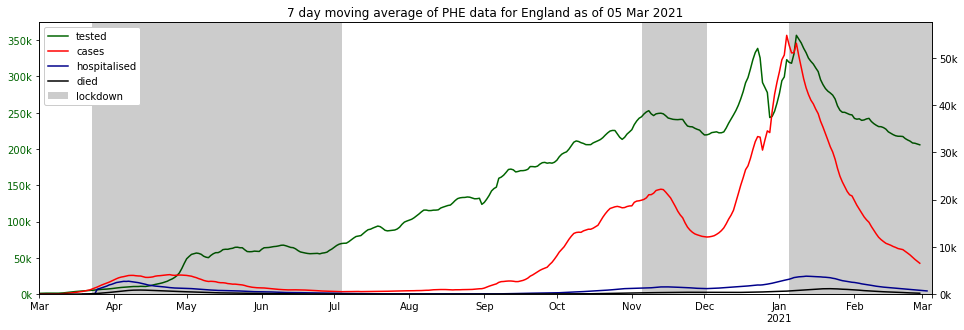

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

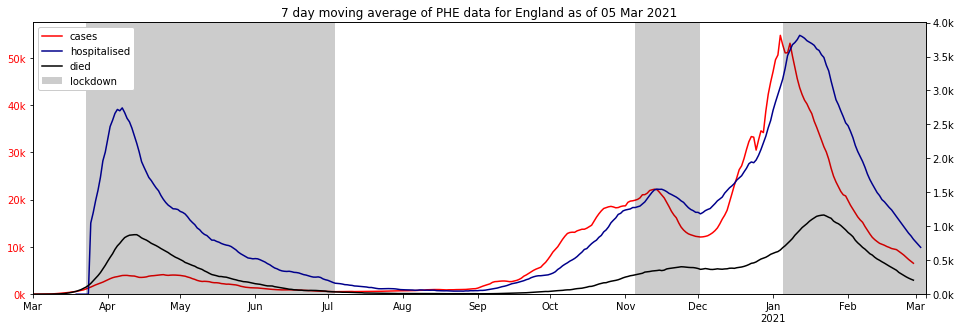

In [3]:
plot_summary(left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,729265.0,18106090.0,17376825.0,56286961,1.295620,30.871848,67.832532
1,Northern Ireland,N92000002,41787.0,568011.0,526224.0,1893667,2.206671,27.788624,70.004705
2,Scotland,S92000003,108197.0,1717672.0,1609475.0,5463300,1.980433,29.459759,68.559808
3,Wales,W92000004,154819.0,967042.0,812223.0,3152879,4.910401,25.761312,69.328287


'partial: 21,358,815, full: 1,034,068'

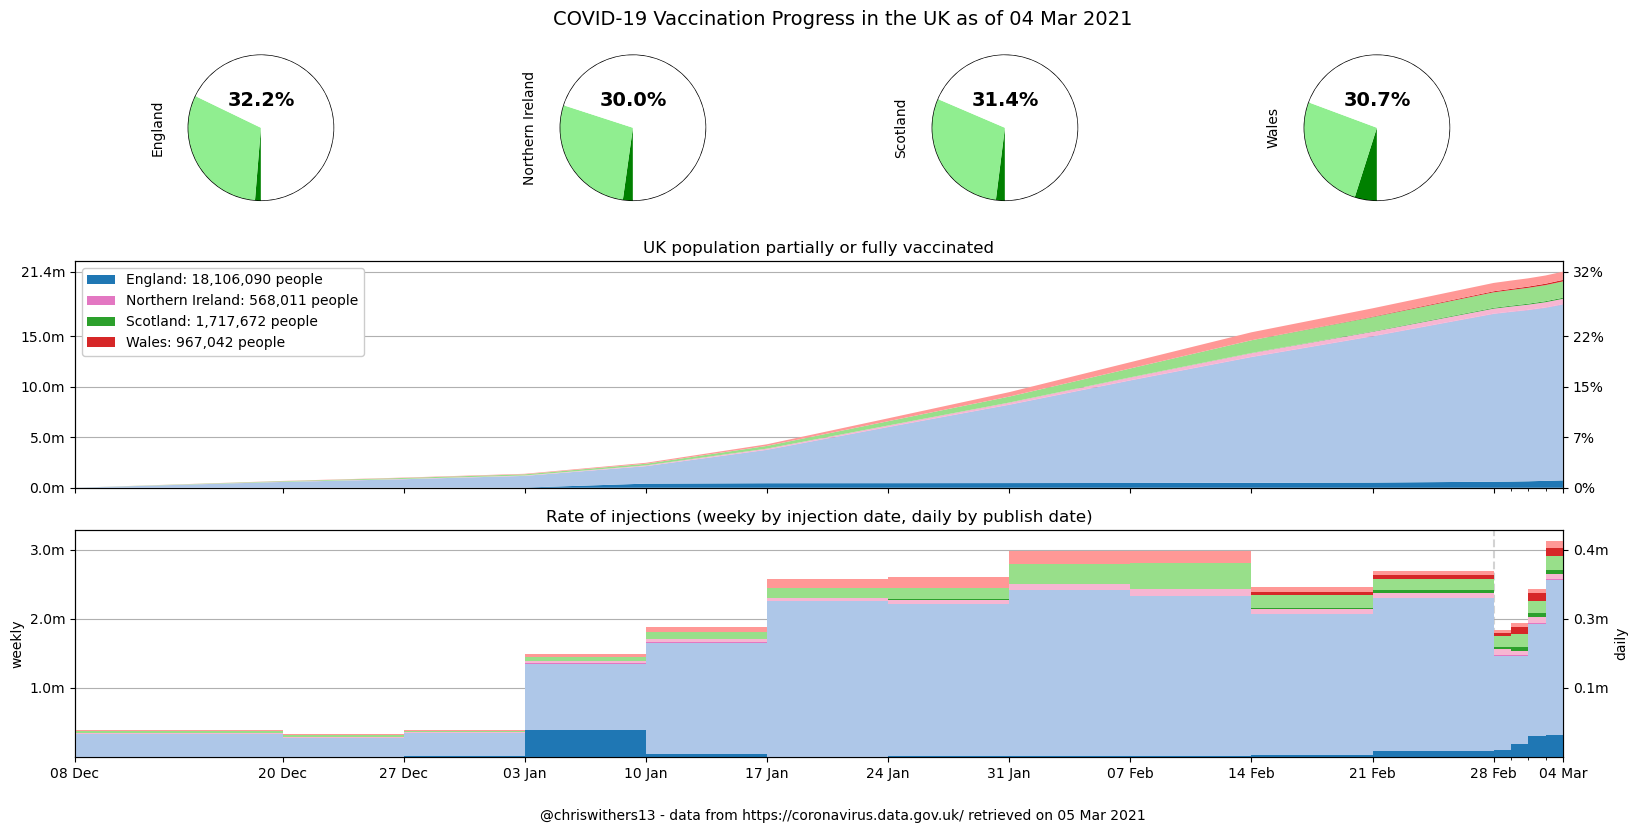

In [4]:
results = vaccination_dashboard(show_partial=True)
display(results, f"partial: {results['any'].sum():,.0f}, full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,04 Mar 21,"+320,388","+45,045","+45,045","+18,106,090","+729,265","+729,265"
Northern Ireland,04 Mar 21,"+11,290","+1,648","+1,648","+568,011","+41,787","+41,787"
Scotland,04 Mar 21,"+29,064","+8,139","+8,139","+1,717,672","+108,197","+108,197"
Wales,04 Mar 21,"+15,502","+15,374","+15,374","+967,042","+154,819","+154,819"


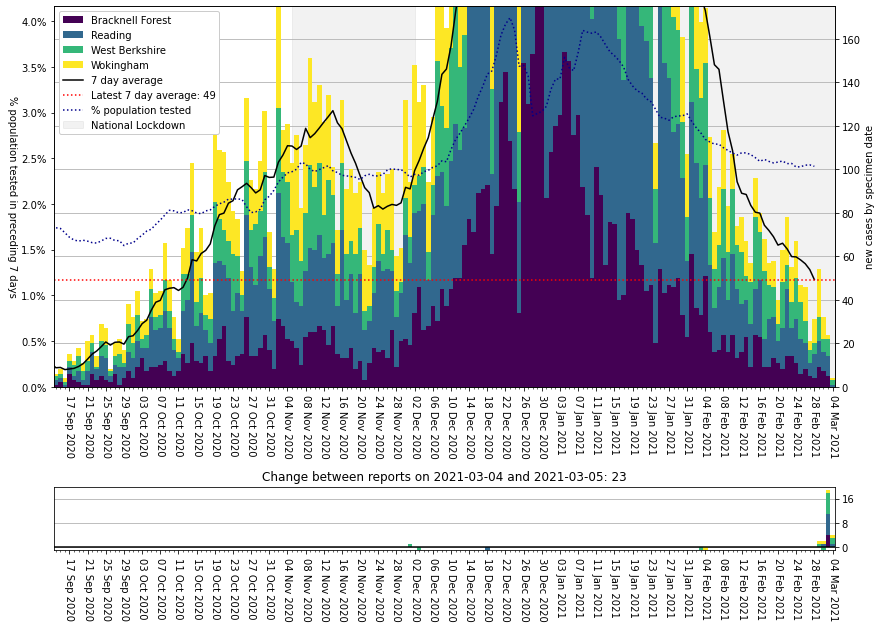

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

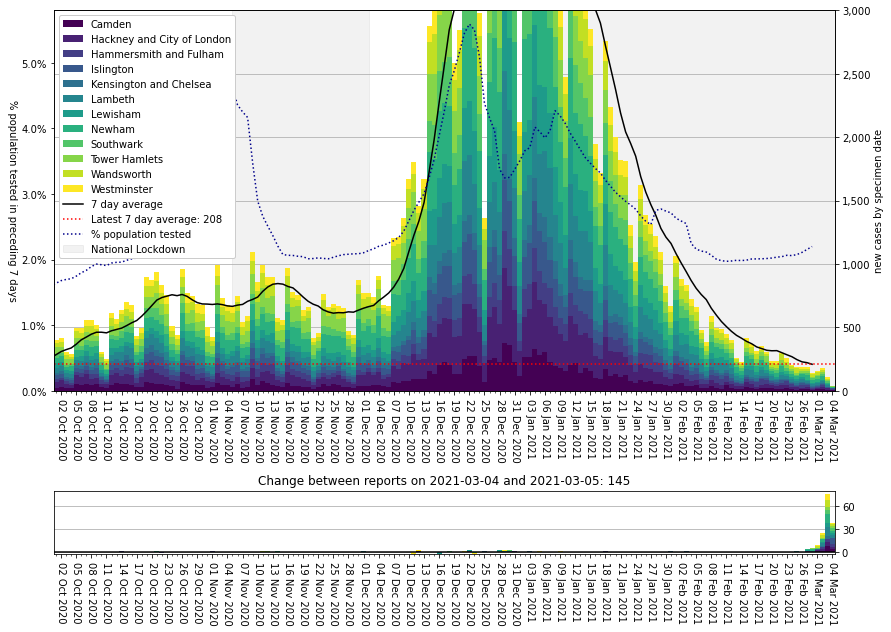

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000039,South Derbyshire,138.913491,149.0,2021-03-04
S12000005,Clackmannanshire,135.816841,70.0,2021-03-04
E08000016,Barnsley,128.814823,318.0,2021-03-04
E08000018,Rotherham,128.103206,340.0,2021-03-04
E06000016,Leicester,127.602873,452.0,2021-03-04
E07000236,Redditch,125.497003,107.0,2021-03-04
E06000010,"Kingston upon Hull, City of",125.491766,326.0,2021-03-04
E07000134,North West Leicestershire,124.504155,129.0,2021-03-04
E07000123,Preston,122.262200,175.0,2021-03-04


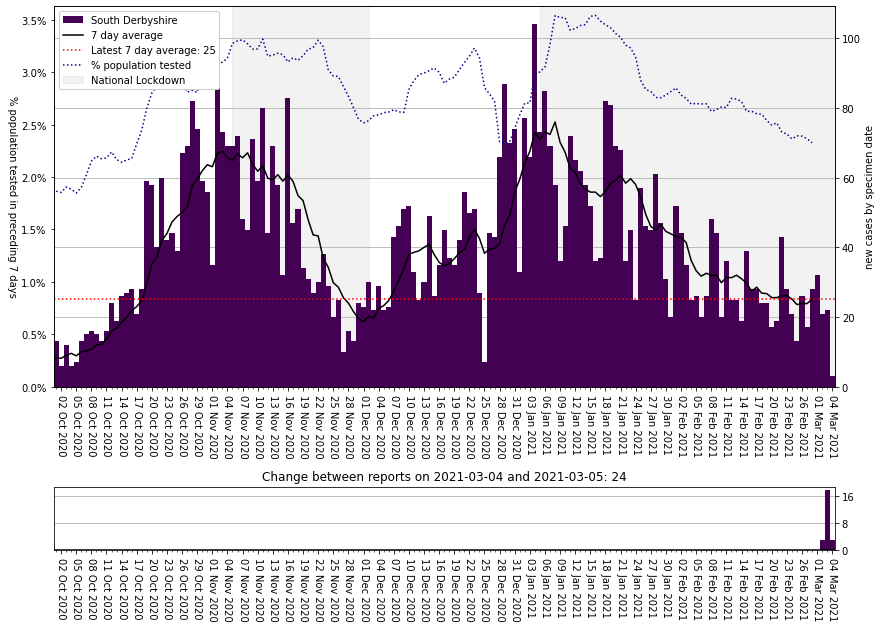

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,78.996966,902.0,2021-03-04
E08000032,Bradford,122.087681,659.0,2021-03-04
E08000035,Leeds,82.835417,657.0,2021-03-04
S12000049,Glasgow City,92.873389,588.0,2021-03-04
E06000016,Leicester,127.602873,452.0,2021-03-04
E06000047,County Durham,79.985814,424.0,2021-03-04
E08000019,Sheffield,72.325866,423.0,2021-03-04
E08000036,Wakefield,119.433152,416.0,2021-03-04
E08000003,Manchester,74.160092,410.0,2021-03-04


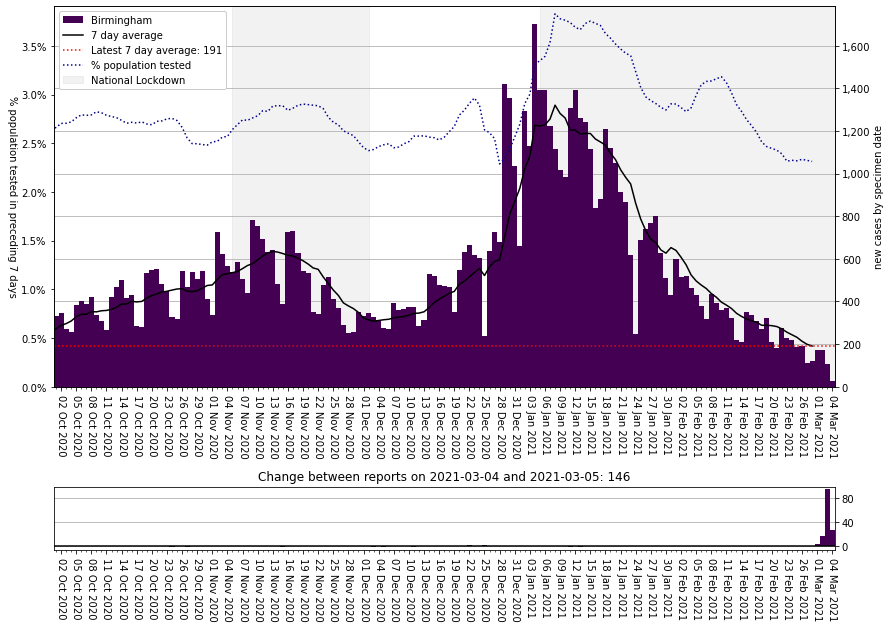

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

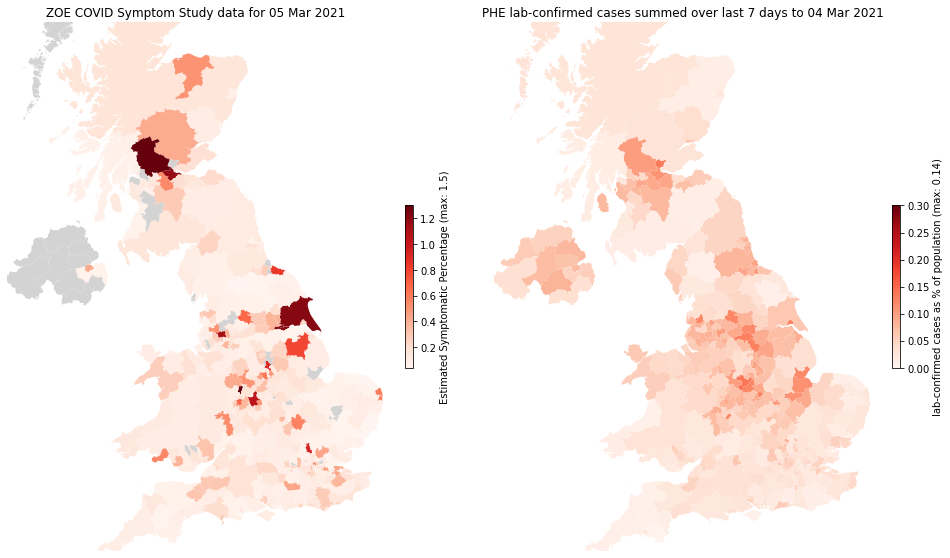

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

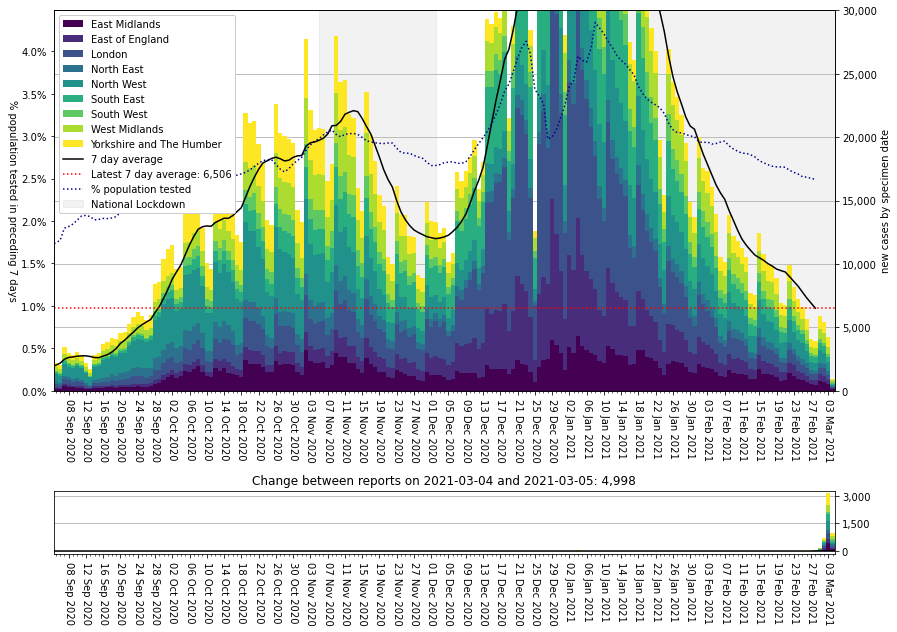

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

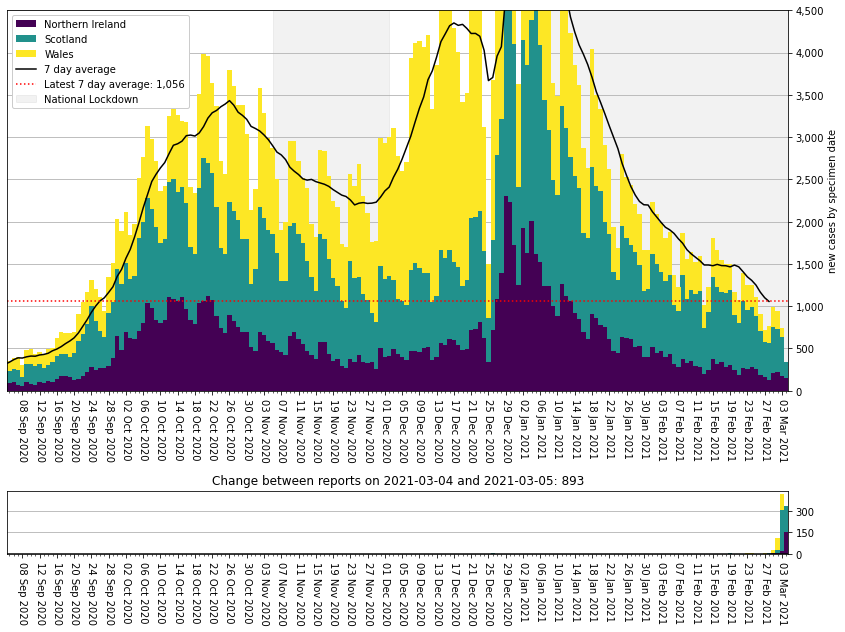

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')